# CardioVascular Disease Prediction

### Importing Basic Libraries & Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot  as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Importing the Datsaset
Cardio_DF = pd.read_csv('cardiovascular_data.csv',sep=";")


The dataset contains information on cardiovascular disease (CVD) for a group of patients. The data consists of 11 features, including objective, examination, and subjective features. The objective features include age, height, weight, and gender, which provide factual information about the patients. The examination features include systolic and diastolic blood pressure, cholesterol, and glucose levels, which are the results of the medical examination. The subjective features include smoking, alcohol intake, and physical activity, which are based on information provided by the patients.

The dataset has 70,000 instances, and the features are represented in different formats. Age is represented in days, height in centimeters, weight in kilograms, blood pressure in mmHg, and cholesterol and glucose levels are represented as categorical codes. Smoking, alcohol intake, and physical activity are binary features that represent whether the patient has indicated the presence or absence of these habits.

The target variable is the presence or absence of CVD, represented by a binary value.

The dataset can be found at: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [3]:
Cardio_DF.head()  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
print("Data dims : ", Cardio_DF.shape)
print("Data type : ", type(Cardio_DF))

Data dims :  (70000, 13)
Data type :  <class 'pandas.core.frame.DataFrame'>


In [5]:
Cardio_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
Cardio_DF.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [7]:
#drop any duplicate rows and rows with missing values
Cardio_DF.drop_duplicates(inplace=True)
Cardio_DF.dropna(inplace=True)

In [8]:
#Age is written in days, so we convert it to years 
Cardio_DF['age'] = (Cardio_DF['age']/365).round(0)

#### For Gender, Women:2, Men:1 - Change to binary

In [9]:
# Convert gender to binary values: 0 women, 1 men
Cardio_DF["gender"] = Cardio_DF["gender"] % 2

#### ID not important, will be dropped for better visualisation

In [10]:
Cardio_DF = Cardio_DF.drop(columns = ['id'])

#### Renaming some features for ease of understanding

In [11]:
Cardio_DF.rename(columns={'gluc': 'glucose', 'alco': 'alcohol'}, inplace=True)

# Exploratory Data Analysis

In [12]:
#Check cells
Cardio_DF.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
0,50.0,0,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,0,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


#### For normal human beings,  Arterial Pressure High (Systolic) is less than 120 mmHg and Arterial Pressure Low (Diastolic) is less than 80 mmHg.
#### ap_hi and ap_lo max are too high. Both are in the ten thousands range, which is impossible for normal human being. Thus, require closer look at.

Diastolic pressure is higher than systolic pressure in 1234 cases


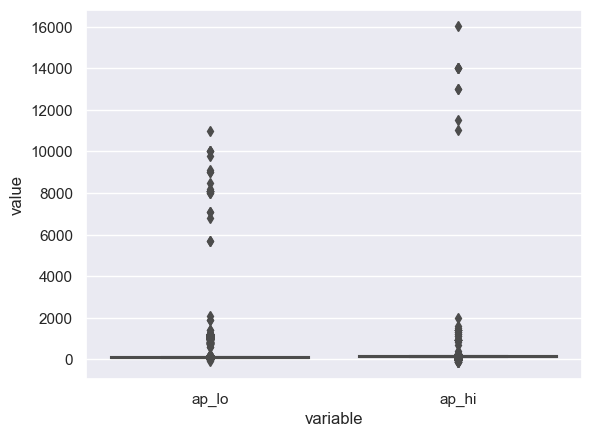

In [13]:
blood_pressure = Cardio_DF[['ap_lo', 'ap_hi']]
sb.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastolic pressure is higher than systolic pressure in {0} cases".format(Cardio_DF[Cardio_DF['ap_lo']> Cardio_DF['ap_hi']].shape[0]))

### SYSTOLIC BLOOD PRESSURE (ap_hi)

In [14]:
Cardio_DF['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

#### Systolic Blood Pressure min and max are too low and high respectively for normal humans.

In [15]:
Cardio_DF.loc[Cardio_DF['ap_hi']==-150]
#values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
35040,64.0,0,168,59.0,-150,80,1,1,0,0,1,1


In [16]:
Cardio_DF.loc[Cardio_DF['ap_hi']==16020]
#values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
40852,48.0,1,169,70.0,16020,80,1,1,0,0,0,1


### DIASTOLIC BLOOD PRESSURE (ap_lo)

In [17]:
Cardio_DF['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

#### Diastolic Blood Pressure min and max are too low and high respectively for normal humans.

In [18]:
Cardio_DF.loc[Cardio_DF['ap_lo']==-70]
# values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
60106,62.0,1,167,74.0,15,-70,1,1,0,0,1,1


In [19]:
Cardio_DF.loc[Cardio_DF['ap_lo']==11000]
# values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
43326,64.0,1,160,105.0,200,11000,1,1,0,0,1,1


#### Will need to remove minimum and maximum of both systolic and diastolic blood pressure.as not applicable to our data.

### Comparing Systolic and Diastolic Blood Pressure

In [20]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(Cardio_DF[Cardio_DF['ap_lo']> Cardio_DF['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


#### Cases in which diastolic pressure is higher than systolic, which is not correct.

In [21]:
print("Diastolic pressure is negative for {0} cases".format(Cardio_DF[Cardio_DF['ap_lo']< 0].shape[0]))

Diastolic pressure is negative for 1 cases


In [22]:
print("Systolic pressure is negative for {0} cases".format(Cardio_DF[Cardio_DF['ap_lo']> Cardio_DF['ap_hi']].shape[0]))

Systolic pressure is negative for 1234 cases


### These are outliers that need to be removed 

Diastolic pressure is higher than systolic pressure in 0 cases


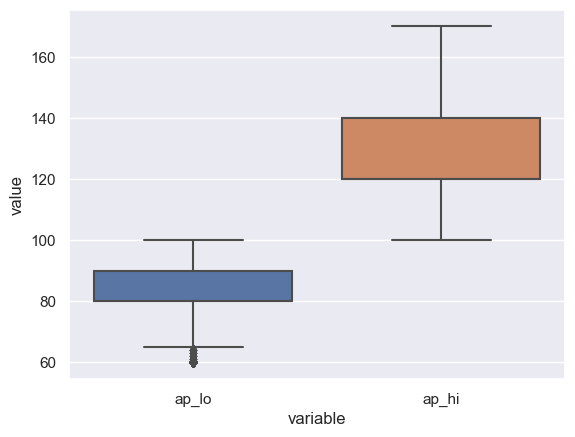

In [23]:
Cardio_DF.drop(Cardio_DF[(Cardio_DF['ap_hi'] > Cardio_DF['ap_hi'].quantile(0.975)) | (Cardio_DF['ap_hi'] < Cardio_DF['ap_hi'].quantile(0.025))].index,inplace=True)
Cardio_DF.drop(Cardio_DF[(Cardio_DF['ap_lo'] > Cardio_DF['ap_lo'].quantile(0.975)) | (Cardio_DF['ap_lo'] < Cardio_DF['ap_lo'].quantile(0.025))].index,inplace=True)

blood_pressure = Cardio_DF[['ap_lo', 'ap_hi']]

sb.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastolic pressure is higher than systolic pressure in {0} cases".format(Cardio_DF[Cardio_DF['ap_lo']> Cardio_DF['ap_hi']].shape[0]))

## Exploring Data Distribution

### Categorical Variables

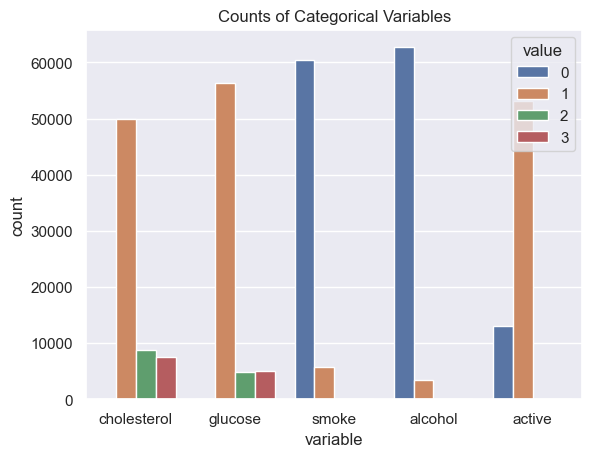

In [24]:
Cardio_DF_categorical = Cardio_DF.loc[:,['cholesterol','glucose', 'smoke', 'alcohol', 'active']]
sb.countplot(x="variable", hue="value",data = pd.melt(Cardio_DF_categorical))
plt.title("Counts of Categorical Variables")
plt.show()

### Gender

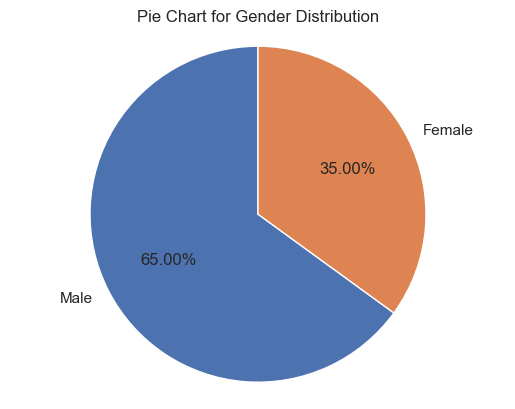

In [25]:
sb.set_style("whitegrid")
plt.pie(Cardio_DF['gender'].value_counts(),autopct='%1.2f%%', startangle=90, labels=['Male', 'Female'])
plt.axis('equal')
plt.title("Pie Chart for Gender Distribution")
plt.show()

## Exploring the Target Variable - CardioVascular Disease (cardio)

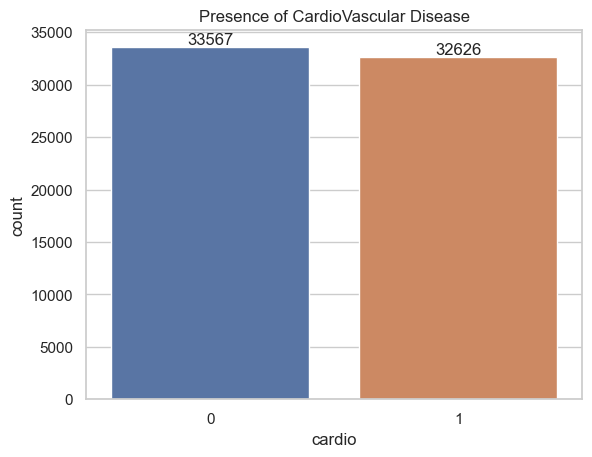

In [26]:
ax = sb.countplot(data=Cardio_DF, x='cardio')
plt.title('Presence of CardioVascular Disease')
#plt.ylim([0,3000])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

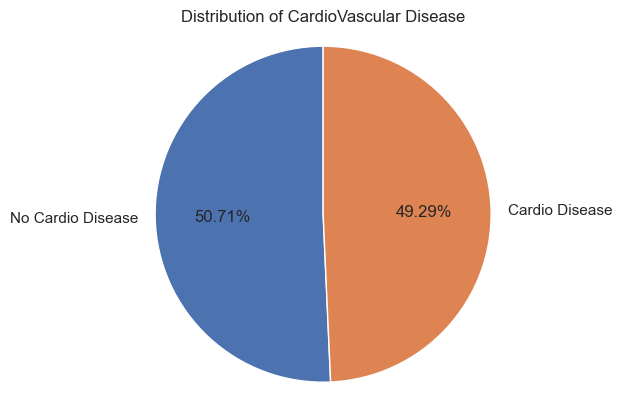

In [27]:
sb.set_style("whitegrid")
plt.pie(Cardio_DF['cardio'].value_counts(),autopct='%1.2f%%', startangle=90, labels=['No Cardio Disease', 'Cardio Disease'])
plt.axis('equal')
plt.title("Distribution of CardioVascular Disease")
plt.show()

### Data well balanced, thus no need to rebalance it.

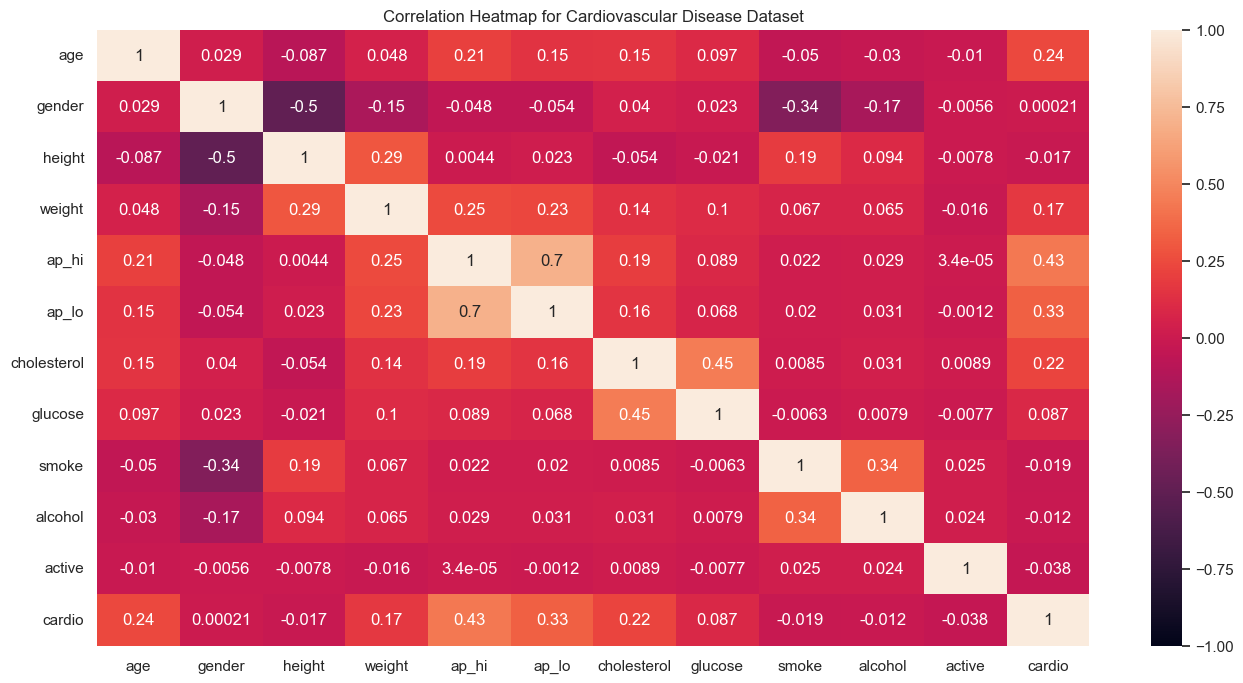

In [28]:
f = plt.figure(figsize=(16,8))
sb.heatmap(data=Cardio_DF.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap for Cardiovascular Disease Dataset")
plt.show()

# Interesting Findings

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22084\1804246841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Cardio_DF['height'][Cardio_DF['cardio']==0],color='blue')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22084\1804246841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Cardio_DF['h

<AxesSubplot: xlabel='height', ylabel='Density'>

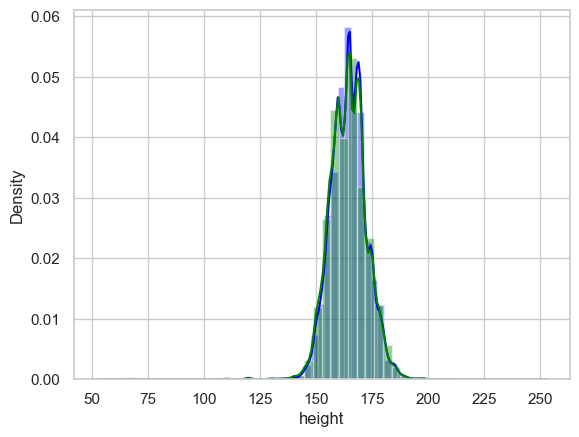

In [29]:
sb.distplot(Cardio_DF['height'][Cardio_DF['cardio']==0],color='blue')
sb.distplot(Cardio_DF['height'][Cardio_DF['cardio']==1],color='green')

### The height distribution for people with cardiovascular disease is same as that without cardiovascular disease. Thusheight might not be a significant factor in determining the disease.

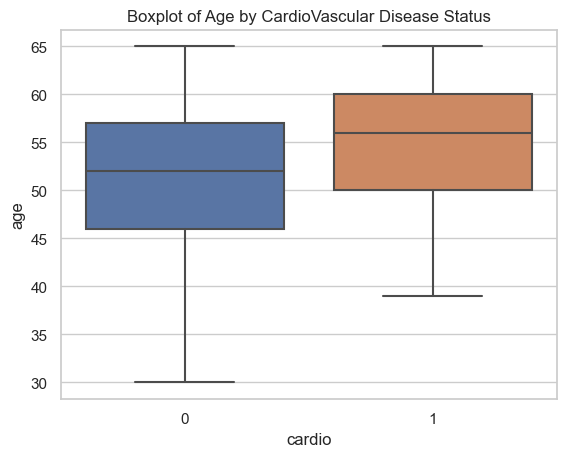

In [30]:
sb.boxplot(x="cardio", y="age", data=Cardio_DF)
plt.title("Boxplot of Age by CardioVascular Disease Status")
plt.show()

### The age distribution for people with cardiovascular disease is different than that without cardiovascular disease. Thus Age might be a significant factor in determining the Disease.

# After Data Cleaning, now we will work on this new Dataset for our Machine Learning Models.

In [31]:
# save the cleaned DataFrame to a new CSV file
Cardio_DF.to_csv('cleaned_cardiovascular_data.csv', index=False)